✅ STEP 4 — NumPy + Sensor Fusion Foundations

File name: numpy_step4.ipynb

This step prepares for real robotics by teaching how sensor values are processed using NumPy:

Gyroscope

Accelerometer

Distance sensors

GPS noise

IMU fusion basics

⭐ What will learn in Step 4 : <br>
✔ Arrays of sensor readings<br>
✔ Filtering noisy sensor data<br>
✔ Moving averages (used in drones & self-driving cars)<br>
✔ Vector magnitude (orientation, acceleration)<br>
✔ Basic fusion: gyro + accelerometer<br>
✔ Plots to visualize sensor stability<br>
✔ Real robotics connections<br>

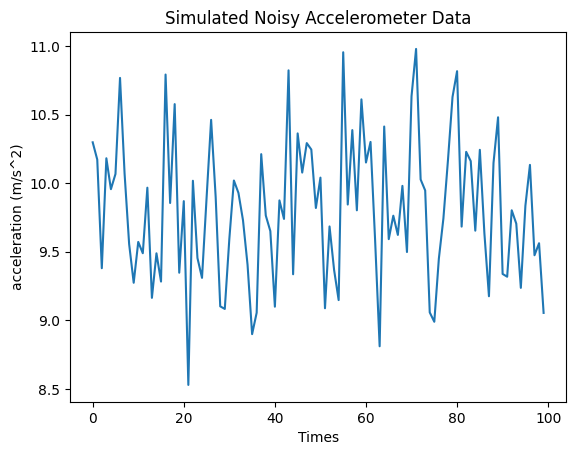

In [ ]:
# 🟦 1. Simulate noisy accelerometer data

import numpy as np
from matplotlib import pyplot as plt

true_acceleration=9.81 # m/s^2
noise=np.random.normal(0,0.5,100) # mean 0, stddev 0.5 and 100 samples
accelerometer_data=true_acceleration+noise # simulated readings

plt.plot(accelerometer_data) # plot the noisy data
plt.xlabel('Times') # time steps on x-axis
plt.ylabel('acceleration (m/s^2)') # acceleration on y-axis
plt.title('Simulated Noisy Accelerometer Data') # title of the plot
plt.show() # display the plot

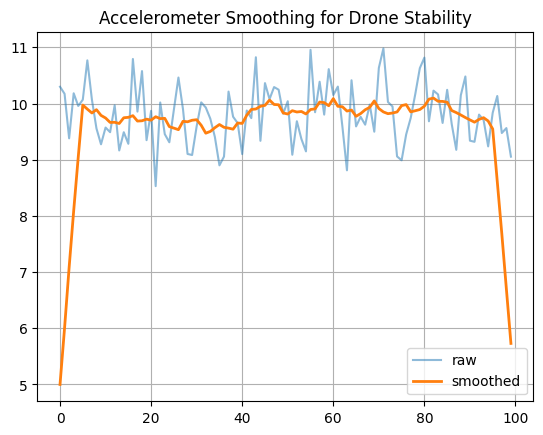

In [ ]:
# Accelerometer Smoothing for Drone Stability

window=10
kernel=np.ones(window)/window # moving average kernel

smoothed_data=np.convolve(accelerometer_data,kernel,mode='same') # apply convolution

plt.plot(accelerometer_data,alpha=0.5,label='raw') # plot raw data
plt.plot(smoothed_data,linewidth=2,label='smoothed') # plot smoothed data
plt.grid(True) # add grid
plt.title('Accelerometer Smoothing for Drone Stability')
plt.legend() # add floating legend on plot


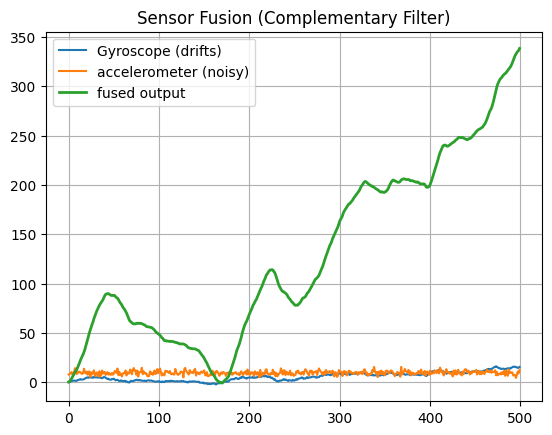

In [ ]:
# simulate pitch angle readings
import numpy as np
from matplotlib import pyplot as plt

gyro=np.cumsum(np.random.normal(0,0.5,500)) # gyroscope data with drift
true_acceleration=9.81  # true acceleration
accelerometer_data=true_acceleration+np.random.normal(0,2,500) # noisy accelerometer data

alpha=0.96 # filter coefficient
fused=np.zeros(500) # array to hold fused output

for i in range(500):
    fused[i]=alpha*(fused[i-1]+gyro[i])+(1-alpha)*accelerometer_data[i] # complementary filter




plt.plot(gyro,label='Gyroscope (drifts)') # plot gyroscope data
plt.plot(accelerometer_data,label='accelerometer (noisy)') # plot accelerometer data
plt.plot(fused,linewidth="2",label='fused output') # plot fused output
plt.legend() # add legend
plt.grid(True) # add grid
plt.title("Sensor Fusion (Complementary Filter)")
plt.show()



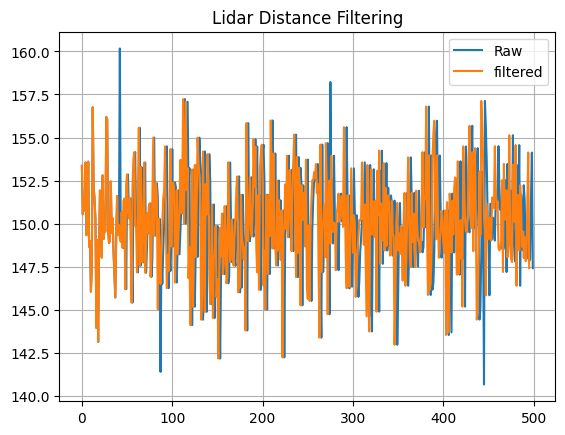

In [ ]:
#🟦 4. Distance sensor (Lidar) filtering

import numpy as np 
from matplotlib import pyplot as plt

# simulate 1D distance readings (cm)
distance=150+np.random.normal(0,3,500) # simulate Lidar distance readings with noise
filtered=distance[np.abs(distance-np.mean(distance))<8] # simple outlier removal

plt.plot(distance,label='Raw')
plt.plot(filtered,label='filtered')
plt.legend()
plt.title("Lidar Distance Filtering")
plt.grid(True)
plt.show()


Motor Commands (first: 10)
[[1000.78551061  999.21448939]
 [1001.51785298  998.48214702]
 [1003.6396049   996.3603951 ]
 [1006.64417961  993.35582039]
 [1009.82974389  990.17025611]
 [1013.4310458   986.5689542 ]
 [1016.73796456  983.26203544]
 [1020.48696097  979.51303903]
 [1023.43095822  976.56904178]
 [1026.07550222  973.92449778]]


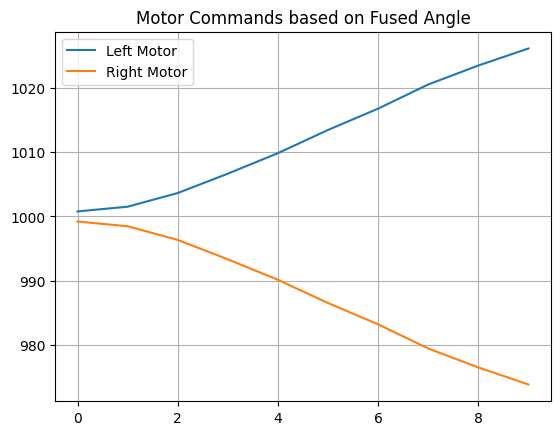

In [30]:
#🟦 5. Create output arrays for drone controller 

motor_left=1000+fused*2 # left motor command
motor_right=1000-fused*2 # right motor command

commands=np.vstack([motor_left,motor_right]).T # vertical stack of array and transpose
commands[:10] # print first 10 commands

print("Motor Commands (first: 10)")
print(commands[:10])

plt.plot(commands[:10],label=['Left Motor','Right Motor']) # plot first 10 motor commands
plt.grid(True)
plt.legend()
plt.title("Motor Commands based on Fused Angle")
plt.show()

